# Progress Report
#### Petar Penev and Nicholas Kovacs

This is a progress report for the class project in CS 7280. Data for atomic interactions for the structure of the large subunit of the ribosome of the bacteria Thermus thermophilus were generated using the software arpeggio. This software calculates many different atomic interactions, but we only really care about are hydrogen bond, Van der Waals, polar, aromatic, hydrophobic, and ionic. The covalent interactions found with the arpeggio program are for inter-residue covalent interactions, which are practically non-existant in the ribosome. We will have to generate this data ourselves, probably through biopython.

Below is how the data was cleaned to produce a dataframe with relevant atomic, residue, chain, and interaction data, using the python package pandas. These dataframes work exceptionally well with networkx as, as networkx has functions that convert graphs to/from pandas adjacency matrices and edgelists. I have generated dataframes that can be inported into networkx as edgelists.

I use the python modules pandas, numpy, and biopython.PDB to clean the data from arpeggio

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 13)

import numpy as np
import networkx as nx
from Bio.PDB import *
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline
from IPython.display import Image

Here, I import the atomic interaction data from arpeggio into 6 dataframes, one dataframe for each phase of rRNA interaction. Each dataset contains interactions within rProteins, between rProteins, within rRNA, and between rRNA and rProtein.

In [2]:
phase1 = pd.read_csv("../Arpeggio_output/TT_LSUPhase1/LSU_Phase1_rRNA_all_rPro.contacts", sep='\t', 
                     names=['Atom1_id','Atom2_id','Clash','Covalent','VdW_Clash','VdW','Proximal',
                            'Hydrogen_Bond','Weak_Hydrogen_Bond','Halogen_Bond','Ionic',
                            'Metal_Complex','Aromatic','Hydrophobic','Carbonyl','Polar',
                            'Weak Polar','Interacting_entities'])
phase1['Phase'] = '1'

phase2 = pd.read_csv("../Arpeggio_output/TT_LSUPhase2/LSU_Phase2_rRNA_all_rPro.contacts", sep='\t', 
                     names=['Atom1_id','Atom2_id','Clash','Covalent','VdW_Clash','VdW','Proximal',
                            'Hydrogen_Bond','Weak_Hydrogen_Bond','Halogen_Bond','Ionic',
                            'Metal_Complex','Aromatic','Hydrophobic','Carbonyl','Polar',
                            'Weak Polar','Interacting_entities'])
phase2['Phase'] = '2'

phase3 = pd.read_csv("../Arpeggio_output/TT_LSUPhase3/LSU_Phase3_rRNA_all_rPro.contacts", sep='\t', 
                     names=['Atom1_id','Atom2_id','Clash','Covalent','VdW_Clash','VdW','Proximal',
                            'Hydrogen_Bond','Weak_Hydrogen_Bond','Halogen_Bond','Ionic',
                            'Metal_Complex','Aromatic','Hydrophobic','Carbonyl','Polar',
                            'Weak Polar','Interacting_entities'])
phase3['Phase'] = '3'

phase4 = pd.read_csv("../Arpeggio_output/TT_LSUPhase4/LSU_Phase4_rRNA_all_rPro.contacts", sep='\t', 
                     names=['Atom1_id','Atom2_id','Clash','Covalent','VdW_Clash','VdW','Proximal',
                            'Hydrogen_Bond','Weak_Hydrogen_Bond','Halogen_Bond','Ionic',
                            'Metal_Complex','Aromatic','Hydrophobic','Carbonyl','Polar',
                            'Weak Polar','Interacting_entities'])
phase4['Phase'] = '4'

phase5 = pd.read_csv("../Arpeggio_output/TT_LSUPhase5/LSU_Phase5_rRNA_all_rPro.contacts", sep='\t', 
                     names=['Atom1_id','Atom2_id','Clash','Covalent','VdW_Clash','VdW','Proximal',
                            'Hydrogen_Bond','Weak_Hydrogen_Bond','Halogen_Bond','Ionic',
                            'Metal_Complex','Aromatic','Hydrophobic','Carbonyl','Polar',
                            'Weak Polar','Interacting_entities'])
phase5['Phase'] = '5'

phase6 = pd.read_csv("../Arpeggio_output/TT_LSUPhase6/LSU_Phase6_rRNA_all_rPro.contacts", sep='\t', 
                     names=['Atom1_id','Atom2_id','Clash','Covalent','VdW_Clash','VdW','Proximal',
                            'Hydrogen_Bond','Weak_Hydrogen_Bond','Halogen_Bond','Ionic',
                            'Metal_Complex','Aromatic','Hydrophobic','Carbonyl','Polar',
                            'Weak Polar','Interacting_entities'])
phase6['Phase'] = '6'

The 6 dataframes are merged into one, all duplicate interactions are removed, and then the dataframe is divided back into 6 dataframes corresponding to which Phase the interactions belong. This step is done to remove interactions within and between the rProteins that are not unique to the rRNA phase. The focus of this project is on interactions that involve rRNA evolutionary phases. 

In [3]:
all_phases = pd.concat([phase1,phase2,phase3,phase4,phase5,phase6])
all_phases = all_phases.drop_duplicates(all_phases.columns.difference(['Phase']), keep=False)
all_phases[['chain1', 'resnum1', 'atom1']] = all_phases['Atom1_id'].str.split('/', expand=True)
all_phases[['chain2', 'resnum2', 'atom2']] = all_phases['Atom2_id'].str.split('/', expand=True)
P1_temp = all_phases.loc[all_phases['Phase'] == '1']
P2_temp = all_phases.loc[all_phases['Phase'] == '2']
P3_temp = all_phases.loc[all_phases['Phase'] == '3']
P4_temp = all_phases.loc[all_phases['Phase'] == '4']
P5_temp = all_phases.loc[all_phases['Phase'] == '5']
P6_temp = all_phases.loc[all_phases['Phase'] == '6']

Here, dataframes are created that involve interactions only with the rRNA

In [4]:
P1_PRI_temp = P1_temp[(P1_temp.chain1 == 'A') | (P1_temp.chain2 == 'A') | (P1_temp.chain1 == 'B') | (P1_temp.chain2 == 'B')].query('chain1 != chain2')
P2_PRI_temp = P2_temp[(P2_temp.chain1 == 'A') | (P2_temp.chain2 == 'A') | (P2_temp.chain1 == 'B') | (P2_temp.chain2 == 'B')].query('chain1 != chain2')
P3_PRI_temp = P3_temp[(P3_temp.chain1 == 'A') | (P3_temp.chain2 == 'A') | (P3_temp.chain1 == 'B') | (P3_temp.chain2 == 'B')].query('chain1 != chain2')
P4_PRI_temp = P4_temp[(P4_temp.chain1 == 'A') | (P4_temp.chain2 == 'A') | (P4_temp.chain1 == 'B') | (P4_temp.chain2 == 'B')].query('chain1 != chain2')
P5_PRI_temp = P5_temp[(P5_temp.chain1 == 'A') | (P5_temp.chain2 == 'A') | (P5_temp.chain1 == 'B') | (P5_temp.chain2 == 'B')].query('chain1 != chain2')
P6_PRI_temp = P6_temp[(P6_temp.chain1 == 'A') | (P6_temp.chain2 == 'A') | (P6_temp.chain1 == 'B') | (P6_temp.chain2 == 'B')].query('chain1 != chain2')

The strucutral bioinformatics biopython module is now used to add atomic and residue data to the dataframes

In [5]:
parser = PDBParser(QUIET=True)
ThTh_PDB = parser.get_structure('ThTh_PDB', '../TT_Phases_PDB/1VY4_LSU_rRNA+rProtein.pdb')

ThTh_list = []
for atom in Selection.unfold_entities(ThTh_PDB, 'A'):
    atom_name = str(atom.id)
    resnum = str(atom.get_parent().id[1])
    resname = str(atom.get_parent().resname)
    chain = str(atom.get_parent().get_parent().id)
    ThTh_list.append([chain, resnum, atom_name, resname, atom.coord[0], atom.coord[1], atom.coord[2]])
    
ThTh_df = pd.DataFrame(ThTh_list, columns=['chain1', 'resnum1', 'atom1', 'resname1', 'x1', 'y1', 'z1'])

P1_merged = pd.merge(P1_PRI_temp, ThTh_df, on=['chain1','resnum1','atom1'])
P2_merged = pd.merge(P2_PRI_temp, ThTh_df, on=['chain1','resnum1','atom1'])
P3_merged = pd.merge(P3_PRI_temp, ThTh_df, on=['chain1','resnum1','atom1'])
P4_merged = pd.merge(P4_PRI_temp, ThTh_df, on=['chain1','resnum1','atom1'])
P5_merged = pd.merge(P5_PRI_temp, ThTh_df, on=['chain1','resnum1','atom1'])
P6_merged = pd.merge(P6_PRI_temp, ThTh_df, on=['chain1','resnum1','atom1'])
ThTh_df = ThTh_df.rename(columns={'chain1':'chain2', 'resnum1':'resnum2', 'atom1':'atom2', 'resname1':'resname2', 'x1':'x2', 'y1':'y2', 'z1':'z2'})
P1_PRI = pd.merge(P1_merged, ThTh_df, on=['chain2','resnum2','atom2'])
P2_PRI = pd.merge(P2_merged, ThTh_df, on=['chain2','resnum2','atom2'])
P3_PRI = pd.merge(P3_merged, ThTh_df, on=['chain2','resnum2','atom2'])
P4_PRI = pd.merge(P4_merged, ThTh_df, on=['chain2','resnum2','atom2'])
P5_PRI = pd.merge(P5_merged, ThTh_df, on=['chain2','resnum2','atom2'])
P6_PRI = pd.merge(P6_merged, ThTh_df, on=['chain2','resnum2','atom2'])

Here is a sample of the unique, atomic interactions between rRNA and rProtein of the 6th phase of ribosomal evolution:

In [6]:
P6_PRI

,Atom1_id,Atom2_id,Clash,Covalent,VdW_Clash,VdW,...,y1,z1,resname2,x2,y2,z2
0,F/136/CB,A/320/N7,0,0,0,0,...,197.929001,216.677994,A,-21.646000,195.264008,219.356003
1,F/136/CG2,A/320/N7,0,0,0,0,...,197.020996,217.102997,A,-21.646000,195.264008,219.356003
2,F/136/OG1,A/320/N7,0,0,0,0,...,197.658997,215.307007,A,-21.646000,195.264008,219.356003
3,F/137/N,A/320/N7,0,0,0,0,...,199.834000,219.141006,A,-21.646000,195.264008,219.356003
4,F/136/CB,A/320/C8,0,0,0,0,...,197.929001,216.677994,A,-20.728001,195.339005,218.421005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9213,E/109/CA,A/2821/OP2,0,0,0,0,...,83.106003,188.397995,A,-25.627001,85.998001,190.240005
9214,E/109/C,A/2821/OP2,0,0,0,0,...,84.569000,188.143005,A,-25.627001,85.998001,190.240005
9215,E/410/O,A/2821/O2',0,0,0,0,...,92.531998,193.367004,A,-26.400000,90.013000,195.014008
9216,E/410/O,A/2826/C2,0,0,0,0,...,92.531998,193.367004,A,-27.525000,92.063004,197.123993


Here is an analysis of the number of residues and their interactions between rRNA and rProtein in Phase 1. Amino acid residues have 3 letter codes, nucleic acid residues have 1 letter codes.

In [7]:
P1_PRI.groupby(["resname1", "resname2"]).size().reset_index(name="Occurances")

,resname1,resname2,Occurances
0,A,ARG,24
1,A,HIS,3
2,A,ILE,1
3,A,LEU,2
4,A,LYS,38
...,...,...,...
91,TRP,G,6
92,TYR,C,19
93,TYR,G,23
94,VAL,C,9


At this time, this dataframe has not been used to make any plots. Below is an example of a 3D-plot that Nick has prepared while looking at his rProtein Interaction data for his thesis. PyMOL, Biopython, NetworkX, and Plotly were the python packages that were used to generate this data. These methods will be applied to this project.

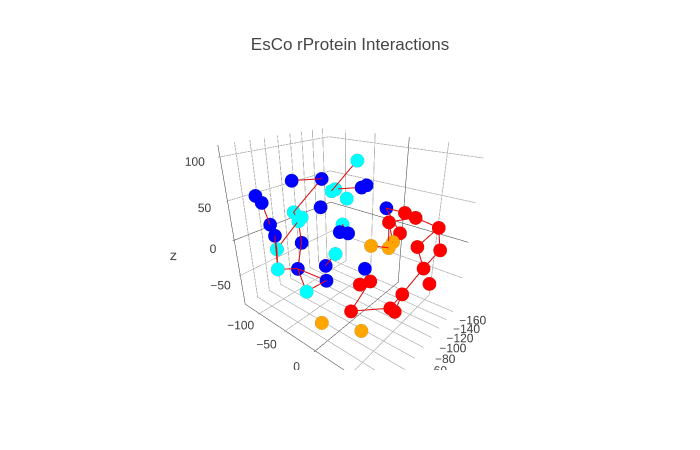

In [8]:
Image(filename='./Progress_report_figs/rProtein_Interactions.png', width=800) 

The next 5 figures show loglog degree distribution graphs for atomistic level of calculations for the first 5 ribosomal phases, the 5 figures after show the residue level. Our networks are quite sparse with highest degrees often bellow 10, given we are using structural data this is to be expected, since an atom can make a certain amount of connections and no more (likewise for a residue). This makes reading a loglog graph somewhat hard since we have quite few data points in comparison to other networks, but still the graphs produced for atomistic level networks imply certain level scale free property to be present. For all 5 phases under scrutiny we can observe a straight-line distribution. 
At the same time this cannot be said with certainty for the networks generated at resolution of residues. Phase 1’s loglog distribution seems quite different than a scale free one, and in fact has a shape similar to that of a random network. As we move to later phases the scale free property does seem to become more pronounced. Further analysis is needed to have any conclusive say on whether our networks are exponential or scale-free.

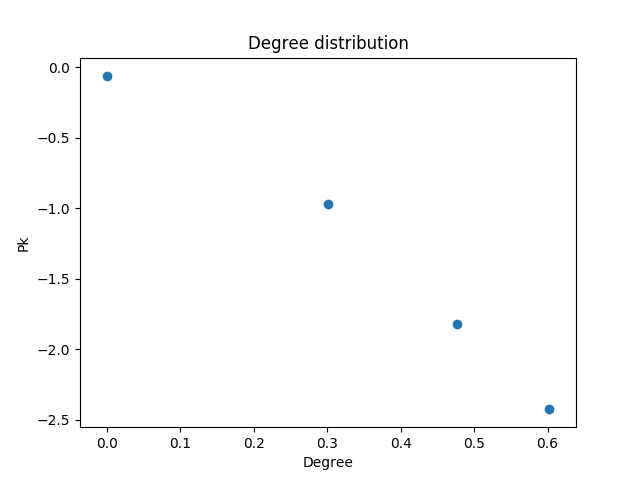

In [15]:
Image(filename='./Progress_report_figs/Atom_plots/adjlist_ph1.txt.degree_histogram.png', width=400)

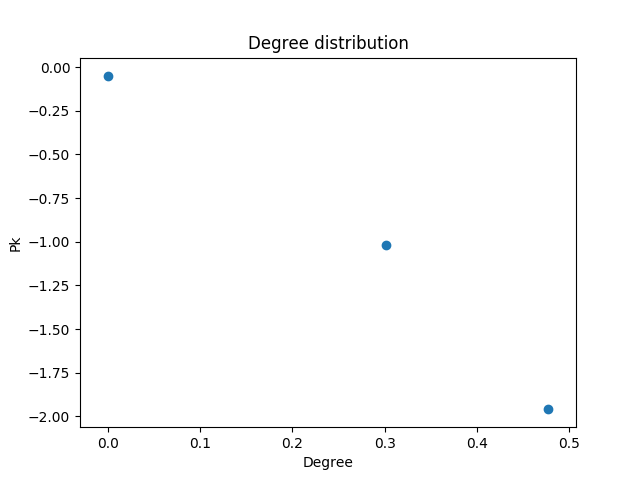

In [16]:
Image(filename='./Progress_report_figs/Atom_plots/adjlist_ph2.txt.degree_histogram.png', width=400) 

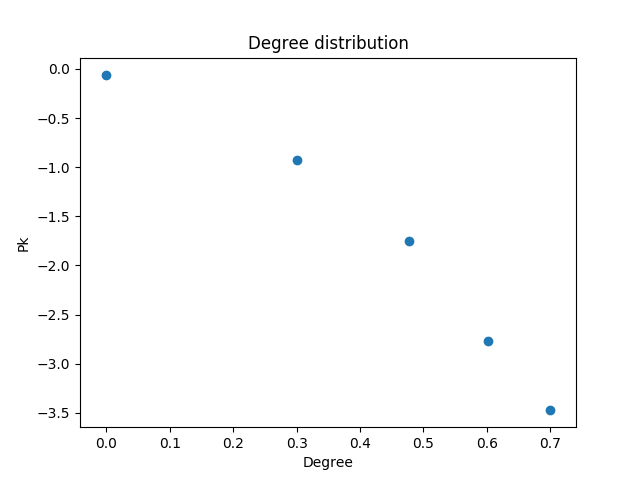

In [17]:
Image(filename='./Progress_report_figs/Atom_plots/adjlist_ph3.txt.degree_histogram.png', width=400) 

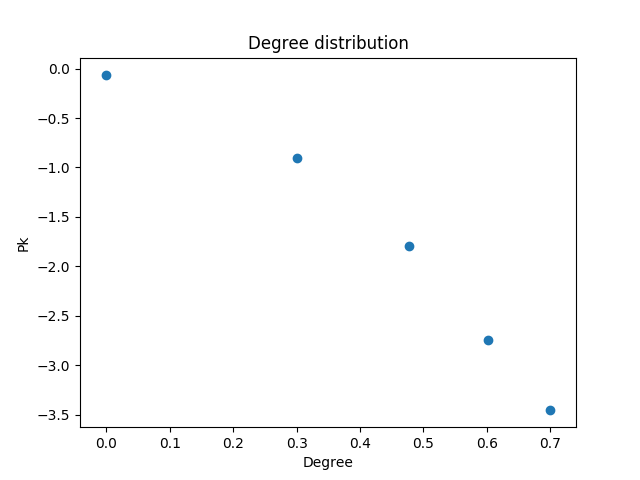

In [18]:
Image(filename='./Progress_report_figs/Atom_plots/adjlist_ph4.txt.degree_histogram.png', width=400) 

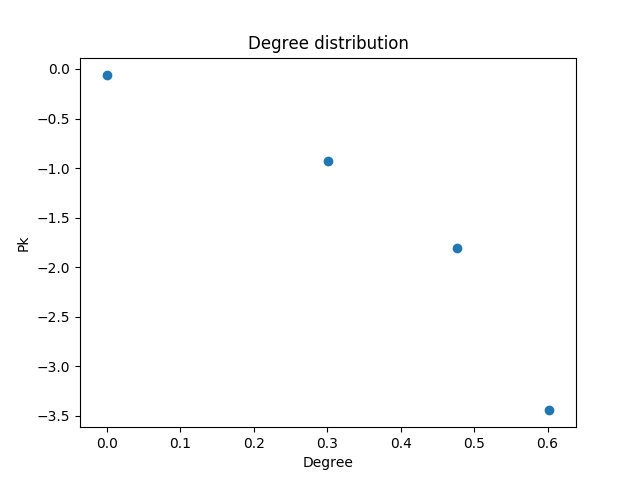

In [19]:
Image(filename='./Progress_report_figs/Atom_plots/adjlist_ph5.txt.degree_histogram.png', width=400) 

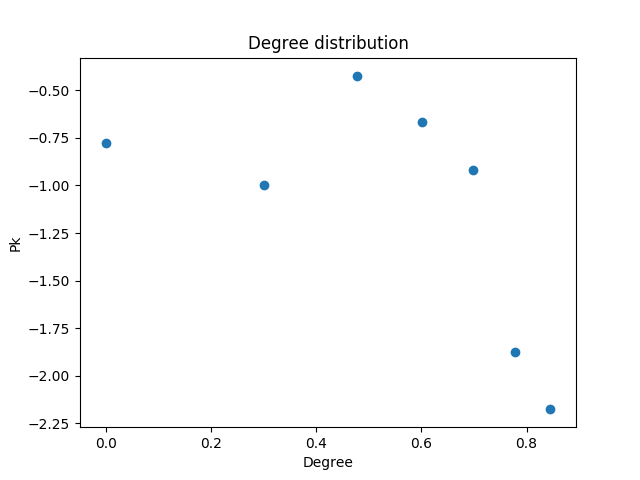

In [20]:
Image(filename='./Progress_report_figs/Residue_plots/adjlist_ph1.txt.degree_histogram.png', width=400) 

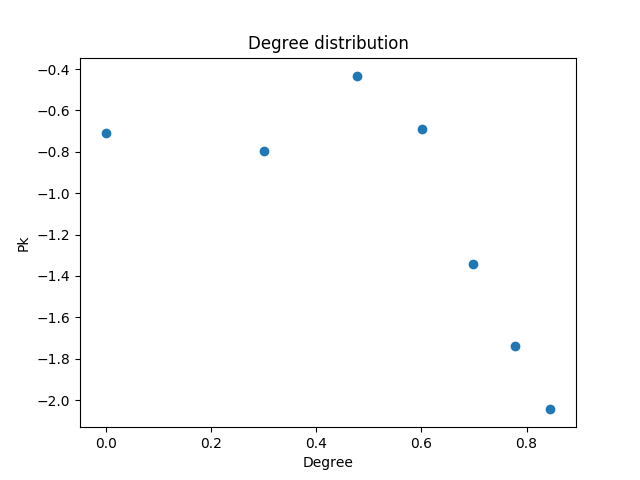

In [21]:
Image(filename='./Progress_report_figs/Residue_plots/adjlist_ph2.txt.degree_histogram.png', width=400) 

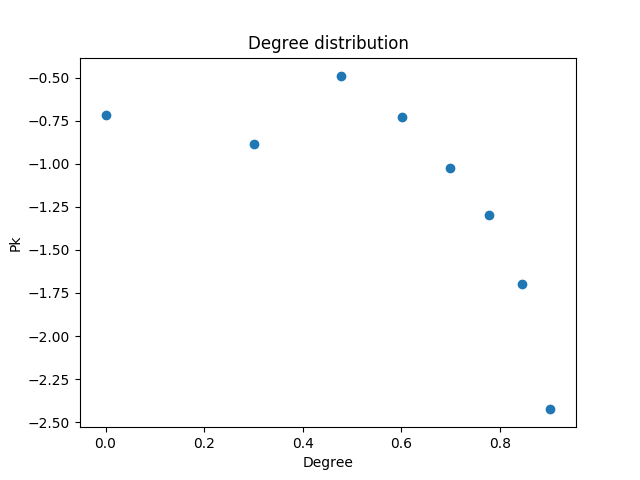

In [22]:
Image(filename='./Progress_report_figs/Residue_plots/adjlist_ph3.txt.degree_histogram.png', width=400) 

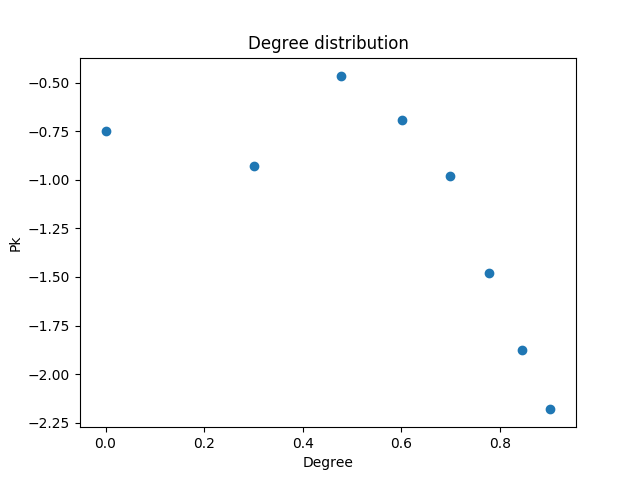

In [23]:
Image(filename='./Progress_report_figs/Residue_plots/adjlist_ph4.txt.degree_histogram.png', width=400) 

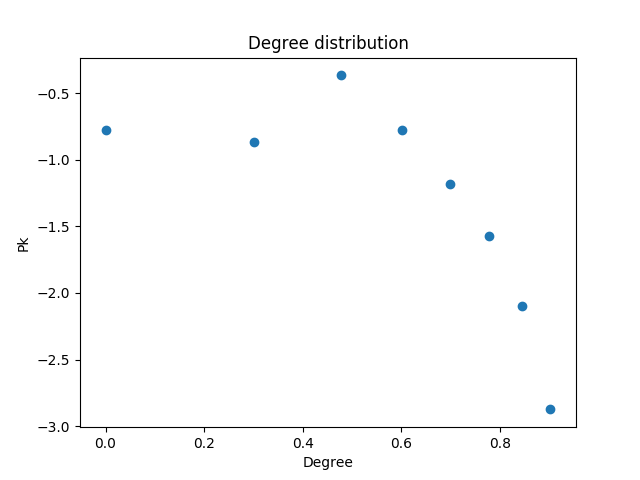

In [24]:
Image(filename='./Progress_report_figs/Residue_plots/adjlist_ph5.txt.degree_histogram.png', width=400) 

We are confident that if we continue massaging the data and looking at it from different perspectives, that we will find interesting patterns. We would like to explore:
- secondary structures of rProtein and rRNA
- compare interactions within rRNA, or rProtein, or between rRNA and rProtein
- look at centrality measures of atoms, residues, secondary structures, rProtein, rRNA
- rRNA-rProtein interface network comparisons
- evolutionary phase interface network comparisons
- and perhaps new metrics and ideas brought up in future lectures